<a href="https://colab.research.google.com/github/cjfghk5697/deeplearnig_practice/blob/imgbot/%EA%B2%BD%EC%82%AC%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>수치 미분</h1>
미분에 관한 설명은 없겠다.

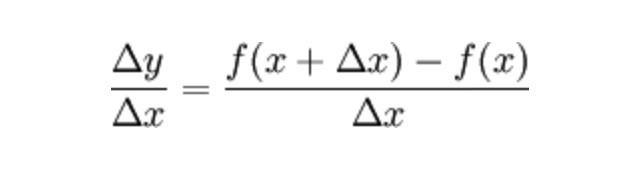

<br>
한순간의 변화량 공식 구현을 해보겠다.

In [2]:
#나쁜 구현 예
def numeric_diff(f,x):
  h=10e-50
  return (f(x+h)-f(x))/h


함수 이름은 수치 미분에서 따온 numericall_diff(f,x)로 했다. h에는 가급적 작은 값을 대입하기 위해 10e-50으로 했다. (가능하다면 h를 -으로 무한히 가깝게 하기 위해서임) 하지만 이 방식은 반올림 오차 문제를 인으킨다. 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 한다. 

In [3]:
import numpy as np
np.float32(1e-50)


0.0

이와 같이 1e-50을 float형으로 나타내면 0.0이 되어 오바로 표현할 수 없다. 너무 작은 값은 컴퓨터 계산에 문제를 준다는 것이다. 여기가 첫번째 개선 포인트이다. 이 미세한 값 h로 10^-4를 구해보자. 이 정도의 값이면 좋은 결과를 얻을 수 있다. 두번째 개선은 함수 f의 차분과 관련한 것이다(임의 두 점에서의 함수 값들의 차이를 뜻한다.).

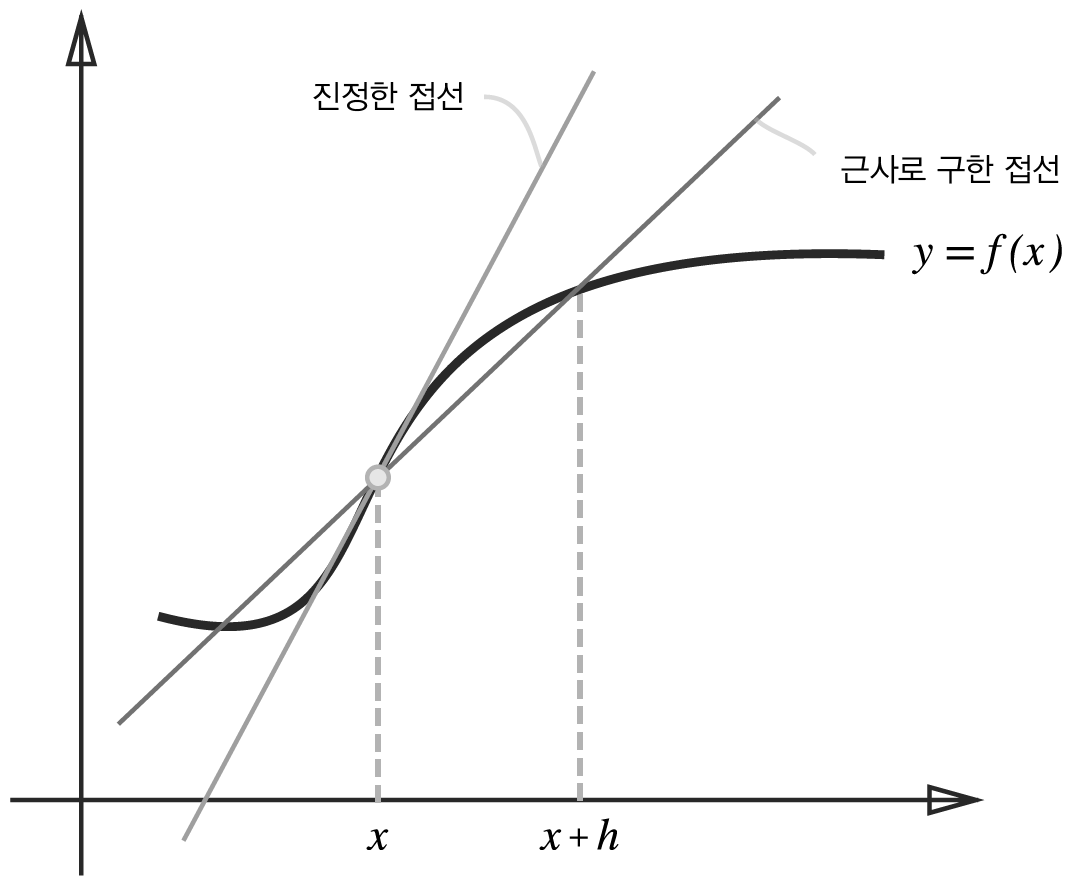

그림을 보면 근사로 구한 미분은 x+h와 x 사이의 기울기지 진정한 미분인 접선의 기울기가 아니다. 그래서 진정한 미분와 기번 구현의 값은 엄밀히는 일치하지 않다. 이 차이는 h를 무한히 좁히지 못하기 때문에 생기는 한계다.
<br><br>
위 그림과 같이 수치 미분에는 오차도 포함된다. 이 오차를 줄이기 위해 x+h일때 함수f와 x-h일때 함수의 차분을 계산하는 방법도 쓰인다. 이 차분은 x를 중심으로 그 전후의 차분을 계한한다는 의미에서 중심 차분 혹은 중앙 차분이라 한다.

In [4]:
def numerical_diff(f,x):
  h=1e-4
  return (f(x+h)- f(x-h)) / (2*h)

두 개선점을 이용해 수치 미분을 다시 구현했다.

<h1>수치 미분의 예</h1>

<h1>편미분</h1>
편미분은 인수들의 제곱 합을 계산하는 단순한 식이다만, 앞의 예와 달리 변수가 2개라는 점에 주의해야한다.

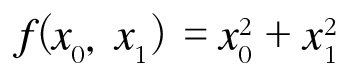

In [5]:
def function_2 (x):
  return x[0]**2+x[1]**2
  

인수 x는 넘파이 배열이다. 이 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구할 뿐인 간단한 구현이다.(np.sum(x**2)형태로도 구현 가능)

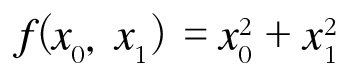

이 함수는 위 그림처럼 3차원으로 그려진다. 이 식을 미분해보자. 변수가 2개이기 때문에 '어떤 변수에 대한 미분이냐', 즉 x0와 x1 중 어느 변수에 대한 미분이냐를 구별해야 한다. 덧붙여 이와 같이 변수가 여럿인 함수에 대한 미분을 편미분이라고 한다. 편미분을 어떻게 구할까?
<br><br>
문제 1: x0=3, x1=4 일때 x0에 대한 편미분을 구하라.

In [6]:
def function_tmp1(x0):
  return x0*x0+4.0**2.0
numerical_diff(function_tmp1,3.0)

6.00000000000378

문제 2: x0=3, x1=4일 때, x1에 대한 편미분을 구하라

In [8]:
def function_tmp2(x1):
  return x1*x1+3.0**2.0
numerical_diff(function_tmp2,4.0)

7.999999999999119

편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구한다. 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정한다. 앞의 예에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해서 새로운 함수를 정의했다. 그리고 그 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구한 것이다.

<h1>기울기</h1>
앞 절의 예에서는 x0과 x1의 편미분을 변수별로 따로 계산했다. 그럼 x0과 x1의 편미분을 동시에 계산하고 싶다면 묶어서 생각해야한다. (127쪽 참고, 설명이 힘듦)
이때 그 묶은 모든 변수의 편미분을 벡터로 정리한 것을 기울기라고 한다.

In [9]:
def numerical_gradient(f, x):
  h=1e-4
  grad=np.zeros_like(x)
  for idx in range(x.size):
    tmp_val=x[idx]
    #f(x+h) 계산
    x[idx]=tmp_val+h
    fxh1=f(x)

    #f(x-h)계산
    x[idx]=tmp_val-h
    fxh2=f(x)

    grad[idx]= (fxh1-fxh2)/(2*h)
    x[idx]=tmp_val
  return grad

numerical_gradien(f,x) 함수의 구현은 복잡해보이지만, 동작 방식은 변수가 하나일떄의 수치 미분과 같다. 참고로, np.seros_like(x)는 x와 형상이 같고 그 원소가 모두 0인 배열을 만든다. numerical_gradient(f,x) 함수의 인수인 f는 함수이고 x는 넘파이 배열이므로 넘파이 배열 x의 각 원소에 대해서 수치 미분을 구한다. 그러면 이함수를 사용해서 실제로 기울기를 계산해보자.
<br> <Br>
(3,4),(0,2),(3,0)에서의 기울기를 구해보겠다.

In [11]:
print(numerical_gradient(function_2, np.array([3.0,4.0])))
print(numerical_gradient(function_2, np.array([0.0,2.0])))
print(numerical_gradient(function_2, np.array([3.0,0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


그렌데 이 기울기라는 게 의미하는 건 뭘까? 

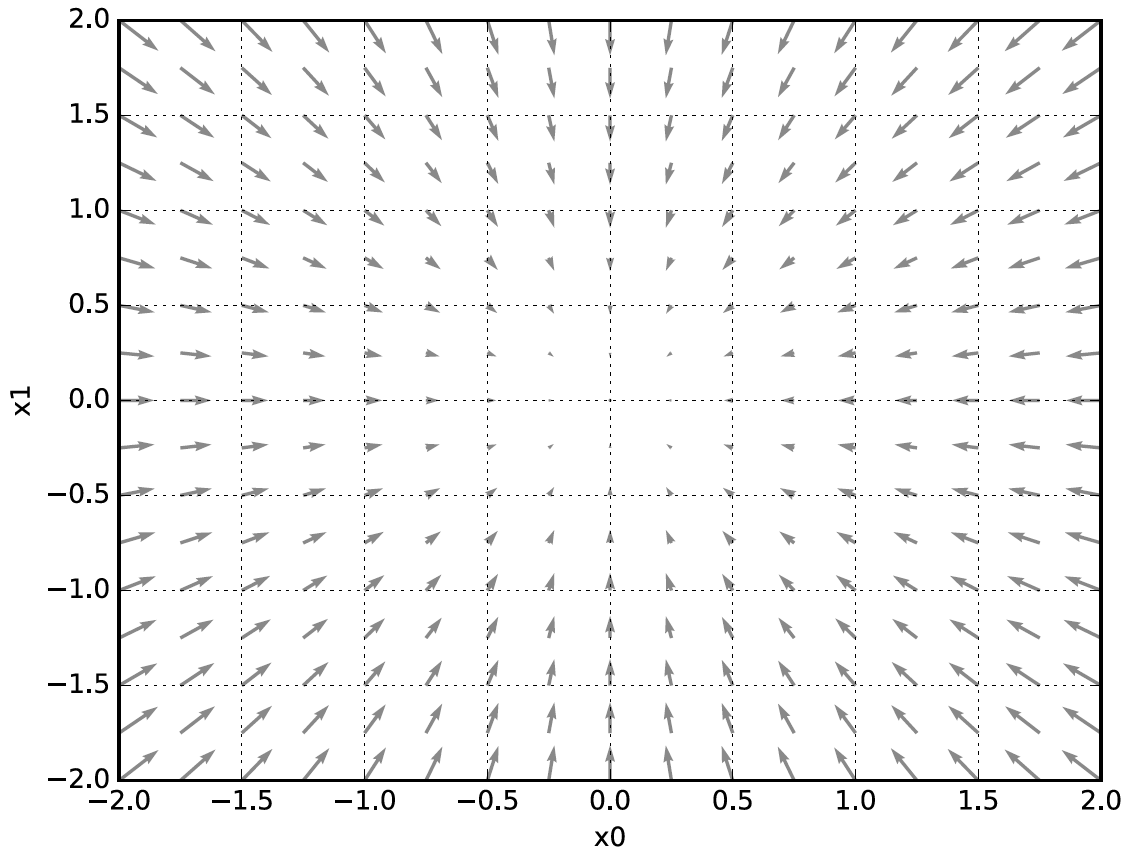
기울기 그림은 방향을 가진 벡터로 그려진다. 그림을 보면 기울기는 함수의 가장 낮은 장소(최솟값)을 가르키는 것 같다. 마치 나침반처럼 화살표들은 한 점을 향하고 있다.또 가장 낮은 곳에서 멀어질수록 화살표의 크기가 커진다. 기울기가 가르키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방법이다.

<H1>경사 하강법</H1>
기계학습 문제 대부분은 학습 단계에서 최적의 매개변수를 찾아야한다. 신경망 역시 최적의 매개변수를 학습 시에 찾아야 한다. 여기에서 최적이란 손실 함수가 최솟값이 될 때의 매개변수 값이다. 하지만 매개변수는 공간이 광대하여 어디가 최솟값이 되는 곳인지 짐작할 수 없다. 이런 상황에서 기울기를 잘 이용해 함수의 최솟값을 찾으려는 것이 경사법이다. <BR><BR>
여기서 조심해야 할 것은 값을 낮추는 방안을 제시하는 지표가 기울기라는 것이다. 그러나 기울기가 가르키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지는 보장할 수 없다. 실제로 복잡한 함수에서는 기울기가 가르키는 방향에 최솟값이 없는 경우가 대부분이다.<br> 기울어진 방향이 꼭 최솟값을 가르키는 것은 아니지만 그 방향으로 가야 함수의 값을 줄일 수 있다.

이제 진짜 경사법이 등장한다. 경사법은 현 위치에서 기울어진 방향으로 일정 거리 만큼 이동, 그런 다음 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복한다. 이렇게 해서 함수의 값을 점차 줄이는 것이 경사법이다. 경사법은 기계학습을 최적화하는 데 흔히 쓰는 방법이다. 특히 신경망 학습에는 경사법을 많이 사용한다. 최솟값을 찾으면 경사 하강법, 최댓값을 찾으면 경사 상승법이라 한다.

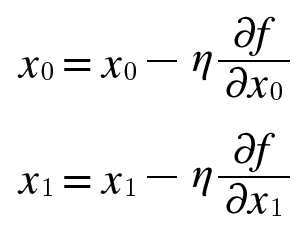

수식의 n처럼 생긴 기호(에타)는 갱신하는 양을 나타낸다. 이를 신경망 학습에서느 학습률이라고 한다. 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률이다.위 식은 1회에 해당하는 갱신이고, 이단계를 반복한다. 즉, 변수의 값을 갱신하는 단계를 여러번 반복하면서 서서히 함수의 값을 줄이는 것이다. 또한 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야한다 일반적으로 값이 너무 크거나 작으면 '좋은 장소'를 칮기가 힘들다.신경망 학습에서는 보통 이 학 습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행한다.

In [13]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x =init_x

  for i in range(step_num):
    grad=numerical_gradient(f,x)
    x-=lr*grad
  return x

인수 f는 최적화하려는 함수, init_x는 초깃값, lr은 learning rate를 의미하는 학습률, step_num은 경사법에 따른 반복 횟수를 뜻한다. 함수의 기울기는 numerical_fradient(f,x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱시하는 처리를 step_num번 반복한다.

In [14]:
def function_2(x):
  return x[0]**2+x[1]**2
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100))


[-6.11110793e-10  8.14814391e-10]


여기에서는 초깃값을 (-3.0,4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작한다. 최종 결과는 (-6.1e-10,8.1e-10)으로 거의 (0,0)에 가까운 값이다. 실제로 진정한 최솟값은(0,0)이므로 경사법으로 거의 정확한 결과를 얻은 것이다. 

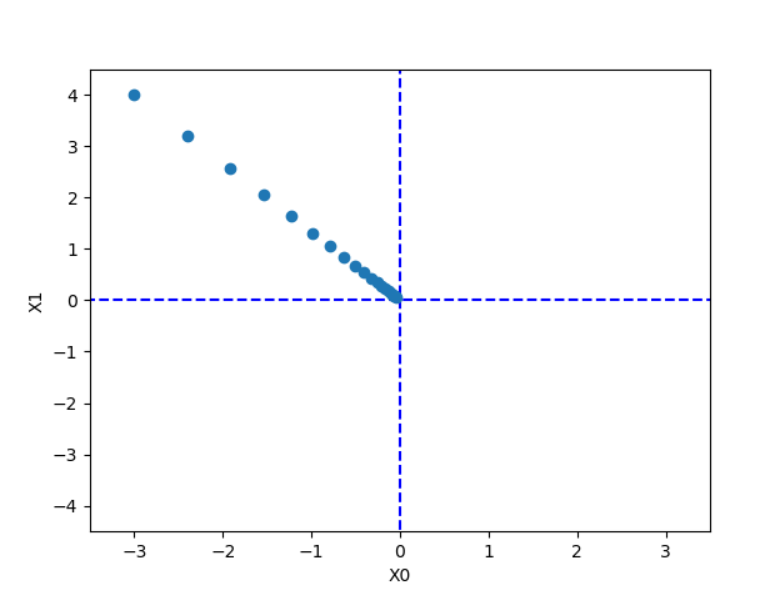

위 그림은 경사법을 사용한 갱신 과정이다. 그리고 학습률이 너무 크면 좋은 값을 얻기 힘들다. 아래를 보면 (0,0)과는 거리가 멀다

In [15]:
init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

init_x=np.array([-3.0,4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


<h1>신경망에서의 기울기</h1>
신경망 학습에서도 기울기가 필요하다. 여기서 말하는 기울기는 가중치 매개변수에 대한 손실 함수의 기울기이다. 예를 들어 형상이 2*3, 가중치가 W, 손실 함수가 L인 신경망을 생각해보자. 이경우 경사는 그림 맨 아래 좌측에 있는거다.

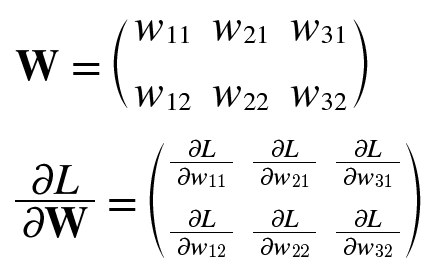

경사의 각 원소는 각각의 원소에 관한 편미분이다. 예를 들어 1행 1번째 원소가 w11을 조금 변경했을 때 손실 함수 L이 얼마나 변화하느냐를 나타낸다. 여기서 중요한 점은 경사의 형상이 W와 같다는 것이다. W와 경사의 형상은 모두 2*3이다.

In [ ]:

# coding: utf-8
import sys, os sys.path.append(os.pardir) # 부모 디렉터리의 파일을 가져올 수 있도록 설정 
import numpy as np from common.functions 
import softmax, cross_entropy_error from common.gradient 
import numerical_gradient 
class simpleNet: 
  def __init__(self): 
    self.W = np.random.randn(2,3) # 정규분포로 초기화 
  def predict(self, x): 
    return np.dot(x, self.W)
  def loss(self, x, t): 
    z = self.predict(x) 
    y = softmax(z) 
    loss = cross_entropy_error(y, t) 

    return loss
    


여기에서는 softmax와 cross_etropy_error 메서드를 사용한다. 그리고 numerical_gradient 메서드도 사용한다. <br>
simple_Net 클래스는 형상이 2*3인 가중치 매개변수 하나를 인스턴스 변수로 갖습니다, 매서드는 2개인데, 하나는 예측을 수행하는 predict(x)이고, 다른 하나는 손실 함수의 값을 구하는 loss(x,t)이다. 여기에서는 인수 x는 입력데이터, t는 정답 레이블이다.<br><br>
파이썬에서는 람다(lambda)기법을 사용하면 편하다. 간단한 함수일 경우에만

In [ ]:
f=lambda w: net.loss(x,t)
dw= numerical_gradient(f, net.W)